In [37]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv('data/kc_house_data.csv',parse_dates=['date'])

## parse the date while importing data is a very usefull tecnique is you working 
## with regression

In [39]:
data.head()
data=data.drop(['id'],1)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


predict space vs price

In [40]:
data1=data[['date','price']]

In [41]:
data1.head()


,date,price
0,2014-10-13,221900.0
1,2014-12-09,538000.0
2,2015-02-25,180000.0
3,2014-12-09,604000.0
4,2015-02-18,510000.0


In [42]:
data2 = data.rename(columns={'date': 'ds'})
data2 = data2.rename(columns={'price': 'y'})

In [43]:

data2.head()

,ds,y,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [44]:
m=Prophet()

In [45]:
m.fit(data2)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/pirate/anaconda2/lib/python2.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [46]:
future = m.make_future_dataframe(periods=365)

In [47]:
future.tail()

,ds
21973,2016-05-22
21974,2016-05-23
21975,2016-05-24
21976,2016-05-25
21977,2016-05-26


In [48]:
forecast = m.predict(future)

In [50]:
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yhat
0,2014-05-02,543632.962006,543632.962006,543632.962006,75532.263721,1.039970e+06,2627.716508,2627.716508,2627.716508,0.0,0.0,0.0,2627.716508,2627.716508,2627.716508,546260.678514
1,2014-05-02,543632.962006,543632.962006,543632.962006,71172.337041,9.578281e+05,2627.716508,2627.716508,2627.716508,0.0,0.0,0.0,2627.716508,2627.716508,2627.716508,546260.678514
2,2014-05-02,543632.962006,543632.962006,543632.962006,74528.956453,1.005764e+06,2627.716508,2627.716508,2627.716508,0.0,0.0,0.0,2627.716508,2627.716508,2627.716508,546260.678514
3,2014-05-02,543632.962006,543632.962006,543632.962006,87308.825833,1.013327e+06,2627.716508,2627.716508,2627.716508,0.0,0.0,0.0,2627.716508,2627.716508,2627.716508,546260.678514
4,2014-05-02,543632.962006,543632.962006,543632.962006,83300.992298,1.004573e+06,2627.716508,2627.716508,2627.716508,0.0,0.0,0.0,2627.716508,2627.716508,2627.716508,546260.678514


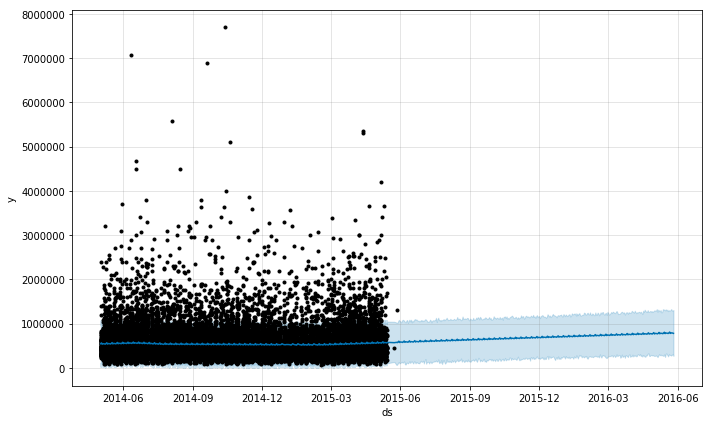

In [51]:
fig1 = m.plot(forecast)

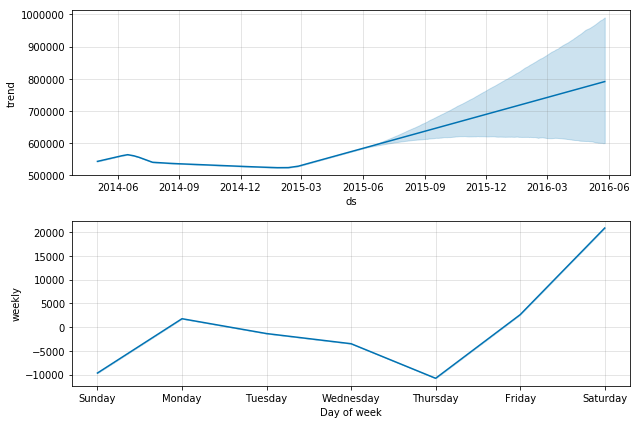

In [52]:
fig2 = m.plot_components(forecast)